# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
validation_file= 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print('Done')

Done


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [5]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = len(X_train)

# Number of validation examples.
n_valid = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

#### Visualization of dataset: Show random original images with labels

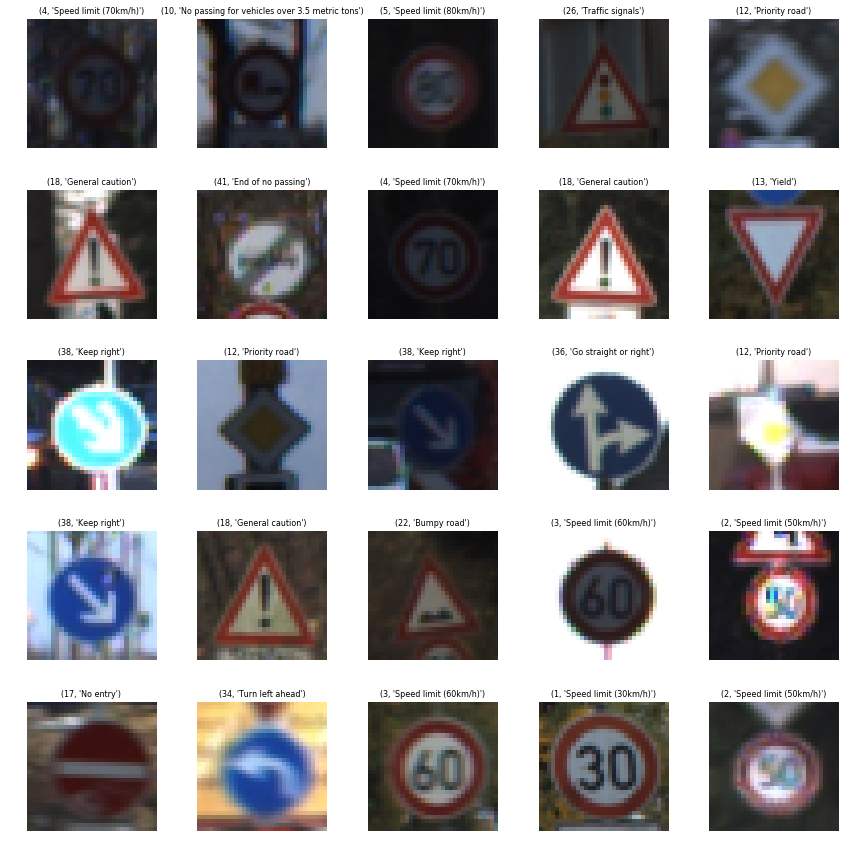

In [3]:
import matplotlib 
import matplotlib.pyplot as plt
import random
import csv
%matplotlib inline


# obtain sign name from 'signnames.csv' file

signname = []
with open('signnames.csv', 'rt') as f:
    data = csv.reader(f)
    for row in data:
        signname.append(row[1])
signname.pop(0)


# plot 25 random images from training data set with labels (class IDs)

fig, ax = plt.subplots(nrows=5, ncols=5 ,figsize=(12,12))
fig.tight_layout()
ax = ax.flatten()
for n in range(25):
    index = random.randint(0, len(X_train))
    ax[n].axis('off')
    label = y_train[index],signname[y_train[index]]
    ax[n].set_title(label,size=8)
    ax[n].imshow(X_train[index])


#### Visualization of dataset: Show histogram of original dataset

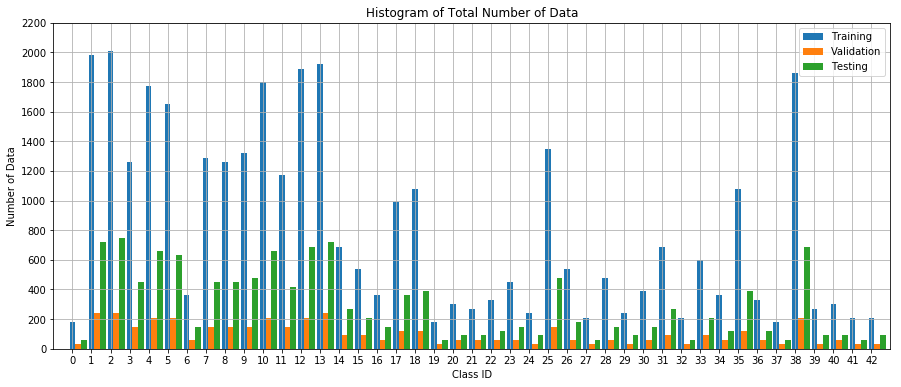

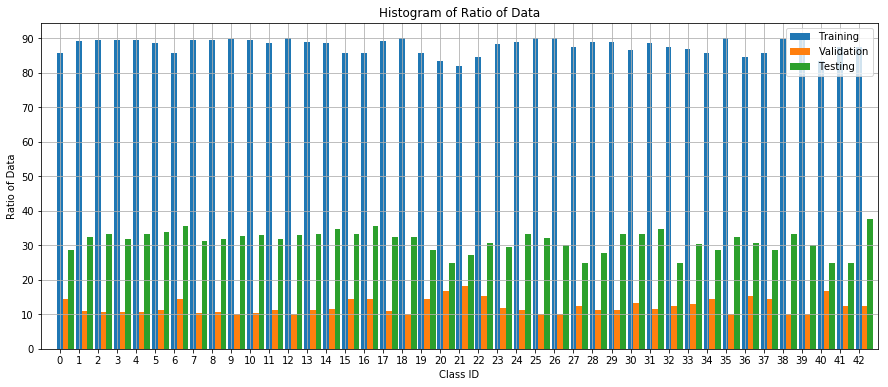

In [6]:
# Histogram of total number of data and their ratio

# total number of data

fig, ax = plt.subplots(1,1,figsize=(15,6))

countsYtrain = np.bincount(y_train,minlength=43)
countsYvalid = np.bincount(y_valid,minlength=43)
countsYtest  = np.bincount(y_test, minlength=43)
maxcounts = max(max(countsYtrain),max(countsYvalid),max(countsYtest))

index = np.arange(n_classes)
bar1 = ax.bar(index, countsYtrain, width=0.3, align='center')
bar2 = ax.bar(index+0.3, countsYvalid, width=0.3, align='center')
bar3 = ax.bar(index+0.6, countsYtest, width=0.3, align='center')
ax.set_title('Histogram of Total Number of Data')
ax.set_xlabel('Class ID')
ax.set_ylabel('Number of Data')
ax.set(xticks=range(n_classes), xlim=[-1, n_classes])
ax.set(yticks=np.arange(0,maxcounts+np.uint8(maxcounts*0.1),200))
ax.grid()
ax.legend((bar1[0], bar2[0], bar3[0]), ('Training', 'Validation', 'Testing'))
plt.show() 

# percent ratio of data

countsTOTAL = np.add(countsYtrain,countsYvalid)
#countsTOTAL = np.add(countsTOTAL,countsYtest)

fig, ax = plt.subplots(1,1,figsize=(15,6))

countsYtrain_ratio = np.round(100*np.divide(countsYtrain,countsTOTAL),2)
countsYvalid_ratio = np.round(100*np.divide(countsYvalid,countsTOTAL),2)
countsYtest_ratio  = np.round(100*np.divide(countsYtest, countsTOTAL),2)
maxcounts = max(max(countsYtrain_ratio),max(countsYvalid_ratio),max(countsYtest_ratio))

index = np.arange(n_classes)
bar1 = ax.bar(index, countsYtrain_ratio, width=0.3, align='center')
bar2 = ax.bar(index+0.3, countsYvalid_ratio, width=0.3, align='center')
bar3 = ax.bar(index+0.6, countsYtest_ratio, width=0.3, align='center')
ax.set_title('Histogram of Ratio of Data')
ax.set_xlabel('Class ID')
ax.set_ylabel('Ratio of Data')
ax.set(xticks=range(n_classes), xlim=[-1, n_classes])
ax.set(yticks=np.arange(0,maxcounts+np.uint8(maxcounts*0.1),10))
ax.grid()
ax.legend((bar1[0], bar2[0], bar3[0]), ('Training', 'Validation', 'Testing'))
plt.show() 


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

#### Pre-process the Data Set: Normalize Dataset and Add Gray-scale Channel

In [ ]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.

import cv2

# normalization using mean and std
def local_normalization(image):
    epsilon = 0.00001
    return (image-np.mean(image))/(np.std(image)+epsilon)

# normalization in the range 0-255
def local_normalization_positive(image):
    img = local_normalization(image)
    img[img[:,:]> 3] = 3
    img[img[:,:]<-3] = -3
    img = (img/6+0.5)
    return 

# Histgram equalization 
def HistEqualize(image):
    return cv2.equalizeHist(image)

# scaling in the range 0.1-0.9 using max value only
def local_scaling(image):
    return 0.1 + image*(0.9-0.1)/(np.amax(image))

# scaling in the range 0.1-0.9 using max and min value
def local_scaling_stretch(image):
    return 0.1 + (image-np.min(image))*(0.9-0.1)/(np.amax(image)-np.min(image))

# Convert RGB to Y in YUV and apply CLAHE
def RGB2Y(data):
    data = cv2.convertScaleAbs(0.299*data[:,:,:,0] + 0.587*data[:,:,:,1] + 0.114*data[:,:,:,2])
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(4,4))
    output = np.empty([0,32,32])
    for img in data:
        output = np.concatenate((output, np.array([clahe.apply(img)])),axis=0)
    return output

# Pre-processing dataset: activation function relu
def pre_processing_relu(num_data,data):
    output = np.zeros((num_data,32,32,4))
    output[...,:3] = np.array([local_scaling_stretch(i) for i in data])
    Y_im = RGB2Y(data)
    output[..., 3] = np.array([local_scaling_stretch(i) for i in Y_im])
    return output

'''
Show raw data before pre-processing: plot image, check mean value 
'''
# plot random RGB X_train image data before pre-processing
fig, ax = plt.subplots(5,1,figsize=(20, 8))
index = np.random.randint(0, len(X_train),size=20)
OriginalColorImage = np.concatenate([X_train[img] for img in index], axis=1)
ax[0].axis('off')
ax[0].imshow(OriginalColorImage)

# check mean value of a image before pre-processing
print('Mean value before normalization:',np.mean(X_train[index]))

'''
pre-processing
'''
X_TRAIN = pre_processing_relu(n_train, X_train)
X_VALID = pre_processing_relu(n_valid,X_valid)
X_TEST = pre_processing_relu(n_test,X_test)

'''
Show processed data: plot image, check data values, check mean value
'''
# plot R image in gray scale
ImageR = np.concatenate([X_TRAIN[img,:,:,0] for img in index], axis=1)
ax[1].axis('off')
ax[1].imshow(ImageR,cmap='gray')

# plot G image in gray scale
ImageG = np.concatenate([X_TRAIN[img,:,:,1] for img in index], axis=1)
ax[2].axis('off')
ax[2].imshow(ImageG,cmap='gray')

# plot B image in gray scale
ImageB = np.concatenate([X_TRAIN[img,:,:,2] for img in index], axis=1)
ax[3].axis('off')
ax[3].imshow(ImageB,cmap='gray')

# check if the values in data are in the range 0.1-0.9
if not X_TRAIN[X_TRAIN[:,:,:,0]>0.91]:
    if not X_TRAIN[X_TRAIN[:,:,:,0]<0.1]: 
        print("R within the range 0.1-0.9")
    else:
        print("******R not within the range 0.1-0.9*******")

# plot Y image 
ImageY = np.concatenate([X_TRAIN[img,:,:,3] for img in index], axis=1)
ax[4].axis('off')
ax[4].imshow(ImageY,cmap='gray')

# check if the values in data are in the range 0.1-0.9
if not X_TRAIN[X_TRAIN[:,:,:,3]>0.91]:
    if not X_TRAIN[X_TRAIN[:,:,:,3]<0.1]: 
        print("Y within the range 0.1-0.9")
    else:
        print("******Y not within the range 0.1-0.9*******")
        
# check mean value of a image before pre-processing
print('Mean value after normalization:',np.mean(X_TRAIN[index]))


X_train = X_TRAIN
X_valid = X_VALID
X_test  = X_TEST


#### Pre-process the Data Set: First Augmentation by Flipping, Rotation, Shearing, and Translation

In [ ]:
import cv2

# combine training and validation data
X_combined = np.concatenate((X_train,X_valid),axis=0)
Y_combined = np.concatenate((y_train,y_valid),axis=0)

# Horizontal flip around vertical axis
# 11, 15, 17, 18, 22, 26, 30, and 35
for i in [11,15,17,18,22,26,30,35]:
    rawim = X_combined[Y_combined[:,]==i]
    X_combined = np.concatenate([X_combined,np.array([cv2.flip(img,1) for img in rawim])],axis=0)
    Y_combined = np.concatenate([Y_combined,np.array([i]*len(rawim))],axis=0)

# Horizontal flip around vertical axis and assign corresponding label 
# 19 and 20
rawim = X_combined[Y_combined[:,]==19]
X_combined = np.concatenate([X_combined,np.array([cv2.flip(img,1) for img in rawim])],axis=0)
Y_combined = np.concatenate([Y_combined,np.array([20]*len(rawim))],axis=0)
rawim = X_combined[Y_combined[:,]==20]
X_combined = np.concatenate([X_combined,np.array([cv2.flip(img,1) for img in rawim])],axis=0)
Y_combined = np.concatenate([Y_combined,np.array([19]*len(rawim))],axis=0)
# 33 and 34
rawim = X_combined[Y_combined[:,]==33]
X_combined = np.concatenate([X_combined,np.array([cv2.flip(img,1) for img in rawim])],axis=0)
Y_combined = np.concatenate([Y_combined,np.array([34]*len(rawim))],axis=0)
rawim = X_combined[Y_combined[:,]==34]
X_combined = np.concatenate([X_combined,np.array([cv2.flip(img,1) for img in rawim])],axis=0)
Y_combined = np.concatenate([Y_combined,np.array([33]*len(rawim))],axis=0)
# 36 and 37
rawim = X_combined[Y_combined[:,]==36]
X_combined = np.concatenate([X_combined,np.array([cv2.flip(img,1) for img in rawim])],axis=0)
Y_combined = np.concatenate([Y_combined,np.array([37]*len(rawim))],axis=0)
rawim = X_combined[Y_combined[:,]==37]
X_combined = np.concatenate([X_combined,np.array([cv2.flip(img,1) for img in rawim])],axis=0)
Y_combined = np.concatenate([Y_combined,np.array([36]*len(rawim))],axis=0)
# 38 and 39
rawim = X_combined[Y_combined[:,]==38]
X_combined = np.concatenate([X_combined,np.array([cv2.flip(img,1) for img in rawim])],axis=0)
Y_combined = np.concatenate([Y_combined,np.array([39]*len(rawim))],axis=0)

## Rotation 
# 40
rawim = X_combined[Y_combined[:,]==40]
r,c,ch = 32,32,3
M = cv2.getRotationMatrix2D((r/2,c/2),120,1)
newim = np.array([cv2.warpAffine(img, M, (r,c),borderMode=cv2.BORDER_REPLICATE) for img in rawim])
X_combined = np.concatenate([X_combined,newim],axis=0)
Y_combined = np.concatenate([Y_combined,np.array([40]*len(newim))],axis=0)
M = cv2.getRotationMatrix2D((r/2,c/2),240,1)
newim = np.array([cv2.warpAffine(img, M, (r,c),borderMode=cv2.BORDER_REPLICATE) for img in rawim])
X_combined = np.concatenate([X_combined,newim],axis=0)
Y_combined = np.concatenate([Y_combined,np.array([40]*len(newim))],axis=0)

## Flip twice
# 32
rawim = X_combined[Y_combined[:,]==32]
newim = np.array([cv2.flip(img,1) for img in rawim])
newim = np.array([cv2.flip(img,0) for img in newim])
X_combined = np.concatenate([X_combined,newim],axis=0)
Y_combined = np.concatenate([Y_combined,np.array([32]*len(newim))],axis=0)

## Shear
# 0,6,14,16,20,21,23,24,26,27,28,29,30,32,34,36,40,41,42
r_trans = 2
c_trans = -1
pts1 = np.float32([[0,0],[r/2,c/2],[r/2,0]])
pts2 = np.float32([[r_trans,c_trans],[r/2,c/2],[r/2+r_trans,c_trans]])
M = cv2.getAffineTransform(pts1,pts2)
for i in [0,6,14,16,20,21,23,24,26,27,28,29,30,32,34,36,40,41,42]:
    rawim = X_combined[Y_combined[:,]==i]
    newim = np.array([cv2.warpAffine(img, M, (r,c),borderMode=cv2.BORDER_REPLICATE) for img in rawim])
    X_combined = np.concatenate([X_combined,newim],axis=0)
    Y_combined = np.concatenate([Y_combined,np.array([i]*len(newim))],axis=0)

## Rotate
# 0,6,16,20,23,24,27,28,29,32,41,42
r,c,ch = 32,32,3
M = cv2.getRotationMatrix2D((r/2,c/2),10,1)
for i in [0,6,16,20,23,24,27,28,29,32,41,42]:
    rawim = X_combined[Y_combined[:,]==i]
    newim = np.array([cv2.warpAffine(img, M, (r,c),borderMode=cv2.BORDER_REPLICATE) for img in rawim])
    X_combined = np.concatenate([X_combined,newim],axis=0)
    Y_combined = np.concatenate([Y_combined,np.array([i]*len(newim))],axis=0)

## Translate
# 0,24,27,29,41,42
M = np.float32([[1,0,0],[0,1,-2]])   
for i in [0,24,27,29,41,42]:
    rawim = X_combined[Y_combined[:,]==i]
    newim = np.array([cv2.warpAffine(img, M, (r,c),borderMode=cv2.BORDER_REPLICATE) for img in rawim])
    X_combined = np.concatenate([X_combined,newim],axis=0)
    Y_combined = np.concatenate([Y_combined,np.array([i]*len(newim))],axis=0)

## Rotate cw and ccw
# 19,21,22,31,37
Mcw  = cv2.getRotationMatrix2D((r/2,c/2),10,1)
Mccw = cv2.getRotationMatrix2D((r/2,c/2),-10,1)
for i in [19,21,22,31,37]:
    rawim = X_combined[Y_combined[:,]==i]
    newim_cw  = np.array([cv2.warpAffine(img, Mcw,  (r,c),borderMode=cv2.BORDER_REPLICATE) for img in rawim])
    newim_ccw = np.array([cv2.warpAffine(img, Mccw, (r,c),borderMode=cv2.BORDER_REPLICATE) for img in rawim])
    X_combined = np.concatenate([X_combined,newim_cw,newim_ccw],axis=0)
    Y_combined = np.concatenate([Y_combined,np.array([i]*len(newim_cw))] ,axis=0)
    Y_combined = np.concatenate([Y_combined,np.array([i]*len(newim_ccw))],axis=0)

for i in range(43):
    if not len(X_combined[Y_combined[:,]==i])==len(Y_combined[Y_combined[:,]==i]):
        print('X and Y dimension not match')
    
print('Done')

#### Pre-process the Data Set:  Split dataset into training and validation dataset 

In [ ]:
# Split dataset into training and validation dataset 

from sklearn.utils import shuffle
X_combined, Y_combined = shuffle(X_combined,Y_combined)

X_train, X_valid, y_train, y_valid = np.empty([0,32,32,4]),np.empty([0,32,32,4]),np.empty([0,]),np.empty([0,])

def split_data_fixed(i):
    original_image = X_combined[Y_combined[:,]==i]
    original_label = Y_combined[Y_combined[:,]==i]
    
    v_len = 450
    t_len = 1250
    t_ind = t_len + v_len
    
    validX = original_image[:v_len,:,:,:]
    validY = original_label[:v_len,]    
    
    n_total = len(original_image)
    if n_total > t_len:
        trainX = original_image[v_len:t_ind,:,:,:]
        trainY = original_label[v_len:t_ind,]
    else: 
        trainX = original_image[v_len:,:,:,:]
        trainY = original_label[v_len:,]
    return trainX, validX, trainY, validY


'''
split dataset (either split_data or split_data_fixed function can be used)
'''
for i in np.arange(n_classes):
    X_t, X_v, y_t, y_v = split_data_fixed(i)
    X_train = np.concatenate((X_train,X_t),axis=0)
    X_valid = np.concatenate((X_valid,X_v),axis=0)
    y_train = np.concatenate((y_train,y_t),axis=0)
    y_valid = np.concatenate((y_valid,y_v),axis=0)

print('The dimension of training data after split: ',X_train.shape)
print('The dimension of training data label after split: ',y_train.shape)
print('The dimension of validation data after split: ',X_valid.shape)
print('The dimension of validation data label after split: ',y_valid.shape)

# update number of training examples after splitting
n_train = len(X_train)
n_valid = len(X_valid)


In [ ]:
### plot histogram of datasets after splitting

fig, ax = plt.subplots(3,1,figsize=(15,20))
                       
def histogramPlot(inputs, datatype, axnum):
    counts = np.bincount(inputs)
    ax[axnum].bar(range(n_classes), counts, width=0.8, align='center')
    ax[axnum].set_title('Histogram of '+datatype+' Data')
    ax[axnum].set_xlabel('Class ID')
    ax[axnum].set_ylabel('Number of Samples')
    ax[axnum].set(xticks=range(n_classes), xlim=[-1, n_classes])
    ax[axnum].set(yticks=np.arange(0,max(counts)+100,100))
    ax[axnum].grid()

histogramPlot(y_train, 'Trainig', 0)
histogramPlot(y_valid, 'Validation', 1)
histogramPlot(y_test, 'Testing', 2)


#### Pre-process the Data Set: Second Augmentation by Sharpening, Whitening, Translation, Rotation, Shearing, and Gaussian Blur

In [ ]:
## Augmentation

def augmentation(img):
    
    r,c,ch = img.shape 

    # sharpen
    sharpen = np.random.uniform(-3,1)
    if sharpen > 0:
        x = np.random.uniform(-0.9,-0.8)
        kernel =np.array([[0,x,0], 
                          [x,5,x], 
                          [0,x,0]])
        img = cv2.filter2D(img, ddepth=-1, kernel = kernel)
        img[img[:,:,:]>0.9] = 0.9
        img[img[:,:,:]<0.1] = 0.1
        
    # whitening
    if sharpen < -2:
        add = np.random.uniform(-0.1,0.1)
        img = img+add
        img[img[:,:,:]>0.9] = 0.9
        img[img[:,:,:]<0.1] = 0.1
        
    # translation
    if np.random.uniform(-3,1) > 0:
        r_trans = np.random.uniform(-2,2)
        c_trans = np.random.uniform(-2,2)
        M = np.float32([[1,0,r_trans],[0,1,c_trans]])   
        img = cv2.warpAffine(img, M, (r,c),borderMode=cv2.BORDER_REPLICATE)

    # rotation
    if np.random.uniform(-3,1) > 0:
        ang = np.random.uniform(-4,4)
        M = cv2.getRotationMatrix2D((r/2,c/2),ang,1)
        img = cv2.warpAffine(img, M, (r,c),borderMode=cv2.BORDER_REPLICATE)

    # shear
    if np.random.uniform(-3,1) > 0:
        r_trans = np.random.uniform(-1,1)
        c_trans = np.random.uniform(-1,1)
        pts1 = np.float32([[0,0],[r/2,c/2],[r/2,0]])
        pts2 = np.float32([[r_trans,c_trans],[r/2,c/2],[r/2+r_trans,c_trans]])
        M = cv2.getAffineTransform(pts1,pts2)
        img = cv2.warpAffine(img,M,(r,c),borderMode=cv2.BORDER_REPLICATE)

    # zoom out
    if np.random.uniform(-3,1) > 0:
        trans = np.random.uniform(1,2)
        pts1 = np.float32([[0,0],[r/2,c/2],[r/2,0]])
        pts2 = np.float32([[trans,trans],[r/2,c/2],[r/2,trans]])
        M = cv2.getAffineTransform(pts1,pts2)
        img = cv2.warpAffine(img,M,(r,c),borderMode=cv2.BORDER_REPLICATE)
        
    # Gaussian Blur
    if np.random.uniform(-3,1) > 0:
        add = np.random.uniform(-20,20)
        img = cv2.GaussianBlur(img,(5,5),0.,0.)
        
    return img


def add_images_fixed(i):
    input_image = X_train[y_train[:,]==i]
    count = len(input_image)
    leng = 4000
    if count >= leng:
        output = input_image
    else:
        output = input_image
        n_iter = np.uint8((leng-count)/count)
        for n in np.arange(n_iter):
            output = np.concatenate((output,np.array([augmentation(img) for img in input_image])),axis=0)
        m_iter = leng%count
        for m in np.arange(m_iter):
            output = np.append(output,[augmentation(input_image[m,:,:,:])],0)
    y_TRAIN_AUG.extend([i]*len(output))
    return output    


def add_images_fixed_VALID(i):
    input_image = X_valid[y_valid[:,]==i]
    count = len(input_image)
    leng = 750
    if count >= leng:
        output = input_image
    else:
        output = input_image
        n_iter = np.uint8((leng-count)/count)
        for n in np.arange(n_iter):
            output = np.concatenate((output,np.array([augmentation(img) for img in input_image])),axis=0)
        m_iter = leng%count
        for m in np.arange(m_iter):
            output = np.append(output,[augmentation(input_image[m,:,:,:])],0)
    y_VALID_AUG.extend([i]*len(output))
    return output 


# augmentation
X_TRAIN_AUG = []
y_TRAIN_AUG = []
X_TRAIN_AUG = np.concatenate([add_images_fixed(label) for label in np.arange(n_classes)],axis=0)
y_TRAIN_AUG = np.array(y_TRAIN_AUG)

# augmentation
X_VALID_AUG = []
y_VALID_AUG = []
X_VALID_AUG = np.concatenate([add_images_fixed_VALID(label) for label in np.arange(n_classes)],axis=0)
y_VALID_AUG = np.array(y_VALID_AUG)

print('The dimension of training data after augmentation: ',X_TRAIN_AUG.shape)
print('The dimension of training data label after augmentation: ',y_TRAIN_AUG.shape)
print('The dimension of validation data after augmentation: ',X_VALID_AUG.shape)
print('The dimension of validation data label after augmentation: ',y_VALID_AUG.shape)

# update number of training examples after augmentation
n_train = len(X_TRAIN_AUG)
X_TRAIN = X_TRAIN_AUG
y_train = y_TRAIN_AUG
X_VALID = X_VALID_AUG
y_valid = y_VALID_AUG
X_TEST  = X_test


## Load Pre-Processed Data

In [5]:
import pickle
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import random
import csv
import cv2
%matplotlib inline

X_TRAIN = np.empty([172000,32,32,4])
with open('preprocessed/X_Train_final_1', mode='rb') as f:
    X_TRAIN[:43000,:,:,:] = pickle.load(f)
with open('preprocessed/X_Train_final_2', mode='rb') as f:
    X_TRAIN[43000:86000,:,:,:] = pickle.load(f)
with open('preprocessed/X_Train_final_3', mode='rb') as f:
    X_TRAIN[86000:129000,:,:,:] = pickle.load(f)
with open('preprocessed/X_Train_final_4', mode='rb') as f:
    X_TRAIN[129000:,:,:,:] = pickle.load(f) 
with open('preprocessed/X_Valid_final', mode='rb') as f:
    X_VALID = pickle.load(f)
with open('preprocessed/X_Test_final', mode='rb') as f:
    X_TEST = pickle.load(f)
with open('preprocessed/y_Train_final', mode='rb') as f:
    y_train = pickle.load(f)
with open('preprocessed/y_Valid_final', mode='rb') as f:
    y_valid = pickle.load(f)
with open('preprocessed/y_Test_final', mode='rb') as f:
    y_test = pickle.load(f)
    
n_train = len(y_train)
n_valid = len(y_valid)
n_test  = len(y_test)
n_classes = len(np.unique(y_train))

print('The dimension of training data: ',X_TRAIN.shape)
print('The dimension of training data label: ',y_train.shape)
print('The dimension of validation data: ',X_VALID.shape)
print('The dimension of validation data label: ',y_valid.shape)
print('The dimension of testing data: ',X_TEST.shape)
print('The dimension of testing data label: ',y_test.shape)

print('Done')

The dimension of training data:  (172000, 32, 32, 4)
The dimension of training data label:  (172000,)
The dimension of validation data:  (32250, 32, 32, 4)
The dimension of validation data label:  (32250,)
The dimension of testing data:  (12630, 32, 32, 4)
The dimension of testing data label:  (12630,)
Done


#### Visualization of Dataset after Pre-processing

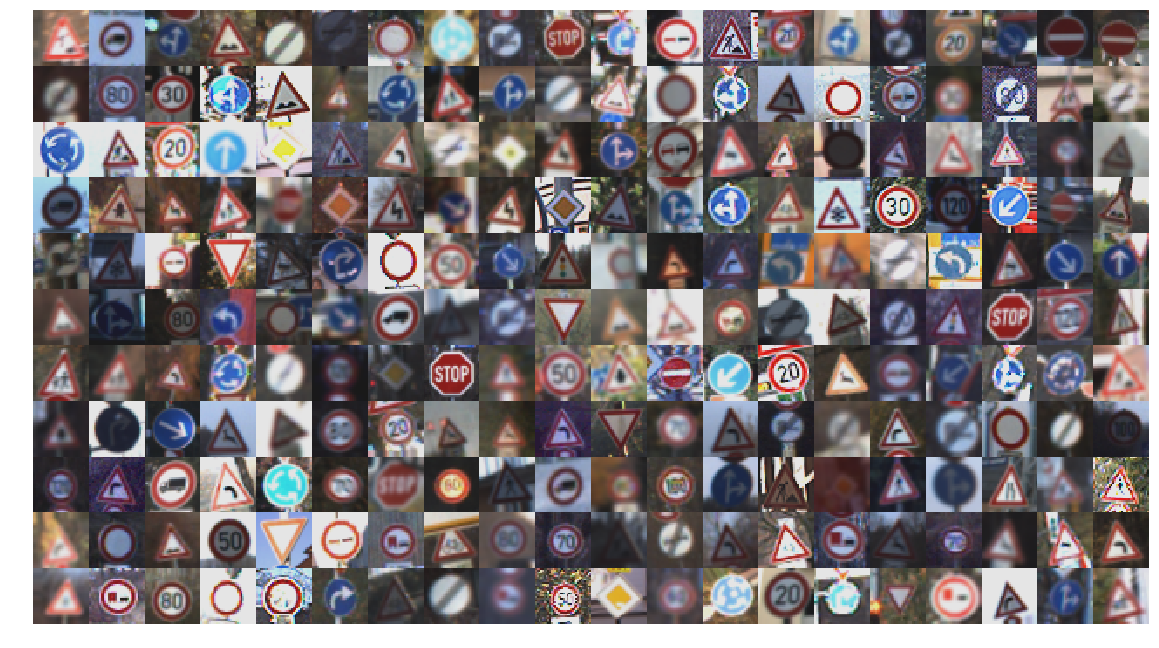

In [6]:
# show some images after augmentation

fig, ax = plt.subplots(1,1,figsize=(20, 20))
IMAGE = np.concatenate([X_TRAIN[img,:,:,0:3] for img in np.random.randint(0,y_train.shape[0],20)], axis=1)
for n in range(10):
    IMG = np.concatenate([X_TRAIN[img,:,:,0:3] for img in np.random.randint(0,y_train.shape[0],20)], axis=1)
    IMAGE = np.concatenate((IMAGE,IMG),axis=0)
ax.imshow(IMAGE[:,:,0:3])
ax.axis('off')
plt.show()

Total number of training data:  172000
Total number of validation data:  32250
Total number of testing data:  12630


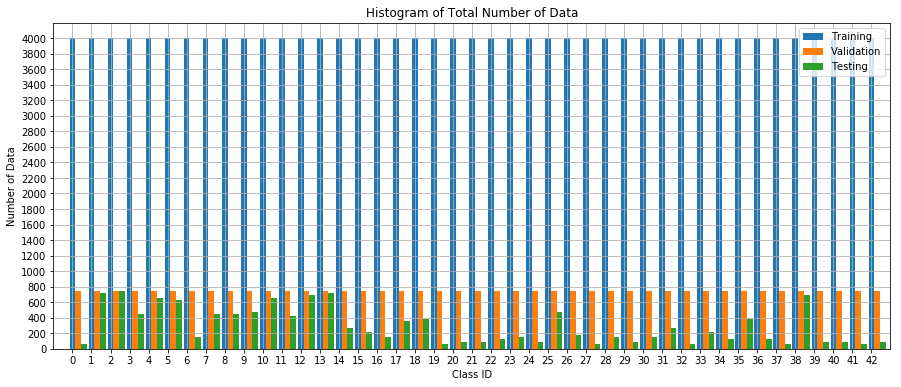

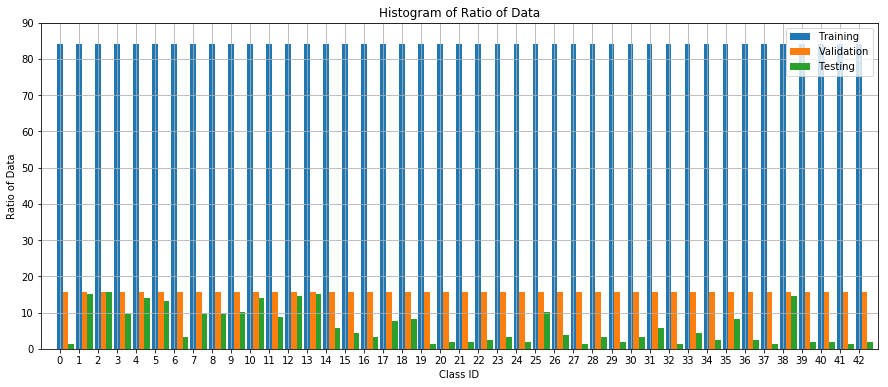

In [7]:
# Histogram of total number of data and their ratio

print('Total number of training data: ',n_train)
print('Total number of validation data: ',n_valid)
print('Total number of testing data: ',n_test)

# total number of data

fig, ax = plt.subplots(1,1,figsize=(15,6))

countsYtrain = np.bincount(y_train,minlength=43)
countsYvalid = np.bincount(y_valid,minlength=43)
countsYtest  = np.bincount(y_test, minlength=43)
maxcounts = max(max(countsYtrain),max(countsYvalid),max(countsYtest))

index = np.arange(n_classes)
bar1 = ax.bar(index, countsYtrain, width=0.3, align='center')
bar2 = ax.bar(index+0.3, countsYvalid, width=0.3, align='center')
bar3 = ax.bar(index+0.6, countsYtest, width=0.3, align='center')
ax.set_title('Histogram of Total Number of Data')
ax.set_xlabel('Class ID')
ax.set_ylabel('Number of Data')
ax.set(xticks=range(n_classes), xlim=[-1, n_classes])
ax.set(yticks=np.arange(0,maxcounts+np.uint8(maxcounts*0.1),200))
ax.grid()
ax.legend((bar1[0], bar2[0], bar3[0]), ('Training', 'Validation', 'Testing'))
plt.show() 

# percent ratio of data

countsTOTAL = np.add(countsYtrain,countsYvalid)
#countsTOTAL = np.add(countsTOTAL,countsYtest)

fig, ax = plt.subplots(1,1,figsize=(15,6))

countsYtrain_ratio = np.round(100*np.divide(countsYtrain,countsTOTAL),2)
countsYvalid_ratio = np.round(100*np.divide(countsYvalid,countsTOTAL),2)
countsYtest_ratio  = np.round(100*np.divide(countsYtest, countsTOTAL),2)
maxcounts = max(max(countsYtrain_ratio),max(countsYvalid_ratio),max(countsYtest_ratio))

index = np.arange(n_classes)
bar1 = ax.bar(index, countsYtrain_ratio, width=0.3, align='center')
bar2 = ax.bar(index+0.3, countsYvalid_ratio, width=0.3, align='center')
bar3 = ax.bar(index+0.6, countsYtest_ratio, width=0.3, align='center')
ax.set_title('Histogram of Ratio of Data')
ax.set_xlabel('Class ID')
ax.set_ylabel('Ratio of Data')
ax.set(xticks=range(n_classes), xlim=[-1, n_classes])
ax.set(yticks=np.arange(0,maxcounts+np.uint8(maxcounts*0.1),10))
ax.grid()
ax.legend((bar1[0], bar2[0], bar3[0]), ('Training', 'Validation', 'Testing'))
plt.show() 


### Model Architecture


In [8]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

from tensorflow.contrib.layers import flatten

def first_conv_layer(inputs, ch_in, ch_out, fil, stride, padding, mu, sigma, name):
    with tf.name_scope(name):
        w = tf.Variable(tf.truncated_normal([fil,fil,ch_in,ch_out], mean = mu, stddev = sigma))
        b = tf.Variable(tf.zeros(ch_out))
        conv = tf.nn.conv2d(inputs,w,strides=[1,stride,stride,1],padding=padding)
        tf.summary.histogram('weights',w)
        tf.summary.histogram('biases',b)   
        
        # prepare filter image for recording
#        filter_min = tf.reduce_min(w)
#        filter_max = tf.reduce_max(w)
#        filters = (w - filter_min) / (filter_max - filter_min) 
#        filters = tf.transpose(filters, [3,0,1,2]) 
#        R_filters = tf.reshape(filters[:,:,:,0], [ch_out,fil,fil,1])
#        G_filters = tf.reshape(filters[:,:,:,1], [ch_out,fil,fil,1])
#        B_filters = tf.reshape(filters[:,:,:,2], [ch_out,fil,fil,1])
#        Y_filters = tf.reshape(filters[:,:,:,3], [ch_out,fil,fil,1])

#        def image_concat(filters,name):
#            fil = tf.split(0,ch_out,filters)
#            fil_row0 = tf.concat(2,fil[0:6])
#            fil_row1 = tf.concat(2,fil[6:12])
#            fil_row2 = tf.concat(2,fil[12:18])
#            fil_final  = tf.concat(1,[fil_row0,fil_row1,fil_row2])
#            tf.summary.image(name,fil_final)

#        image_concat(R_filters,'R_filters')
#        image_concat(G_filters,'G_filters')
#        image_concat(B_filters,'B_filters')
#        image_concat(Y_filters,'Y_filters')    
        
        return conv+b
    
def conv_layer(inputs, ch_in, ch_out, fil, stride, padding, mu, sigma, name):
    with tf.name_scope(name):
        w = tf.Variable(tf.truncated_normal([fil,fil,ch_in,ch_out], mean = mu, stddev = sigma))
        b = tf.Variable(tf.zeros(ch_out))
        conv = tf.nn.conv2d(inputs,w,strides=[1,stride,stride,1],padding=padding)
        tf.summary.histogram('weights',w)
        tf.summary.histogram('biases',b)
        return conv+b
    
def elu(inputs,name):
    with tf.name_scope(name):
        act = tf.nn.elu(inputs)
        tf.summary.histogram('activations',act)   
        return act
    
# define fully connected layer 
def fc_layer(inputs, ch_in, ch_out, mu, sigma, name):
    with tf.name_scope(name):
        w = tf.Variable(tf.truncated_normal([ch_in,ch_out], mean = mu, stddev = sigma))
        b = tf.Variable(tf.zeros(ch_out))
        act = tf.nn.elu(tf.matmul(inputs,w)+b)
        tf.summary.histogram('weights',w)
        tf.summary.histogram('biases',b)
        tf.summary.histogram('activations',act)
        return act

def fc_layer_last(inputs, ch_in, ch_out, mu, sigma, name):
    with tf.name_scope(name):
        w = tf.Variable(tf.truncated_normal([ch_in,ch_out], mean = mu, stddev = sigma))
        b = tf.Variable(tf.zeros(ch_out))
        final = tf.matmul(inputs,w)+b
        tf.summary.histogram('weights',w)
        tf.summary.histogram('biases',b)
        return final
    
# define max pooling
def max_pool(inputs, ksize, stride,padding, name):
    with tf.name_scope(name):
        pool = tf.nn.max_pool(inputs, ksize=[1,ksize,ksize,1], strides=[1,stride,stride,1], padding=padding) 
        return pool

print('done')

done


In [9]:
def LeNet(x,dropout):
    
    # for initializing weights and biases 
    mu = 0       # mean
    sigma = 0.1  # std
    
    conv1 = first_conv_layer(x, 4, 18, 5, 1, 'VALID', mu, sigma, '5x5_S1_D18') 
    LeNet.act1 = elu(conv1,'elu1')
    pool1 = max_pool(LeNet.act1, 2, 2,'VALID', 'MP1_2x2')   
    
    conv2 = conv_layer(pool1, 18, 36, 5, 1, 'VALID',mu, sigma, '5x5_S1_D36') 
    LeNet.act2 = elu(conv2,'elu2')  
    
    conv3 = conv_layer(LeNet.act2, 36, 54, 3, 1, 'VALID', mu, sigma, '3x3_S1_D54') 
    LeNet.act3 = elu(conv3,'elu3') 
    pool2 = max_pool(LeNet.act3, 2, 2,'VALID', 'MP2_2x2')  
    
    flat1 = flatten(pool2)  
    dropout1 = tf.nn.dropout(flat1,dropout)
      
    fc1 = fc_layer(dropout1, 864, 480, mu, sigma, 'fc1_elu_864_480')          
    fc2 = fc_layer(fc1, 480, 168, mu, sigma, 'fc2_elu_480_168')          
    fc3 = fc_layer_last(fc2, 168, 43, mu, sigma, 'fc3_168_43')    

    return fc3

print('Done')

#    flat = tf.reduce_mean([fc1,fc2,fc3,fc4],0)
#    flat = tf.concat(1,[flat1,flatA])

Done


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [10]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

import tensorflow as tf

EPOCHS = 5
BATCH_SIZE = 32
epsi = 0.00000001
dropout = 0.90

with tf.name_scope('input'):
    x = tf.placeholder(tf.float32,(None, 32,32,4), name='x')
    y = tf.placeholder(tf.int32,(None,), name='label')
    keep_prob = tf.placeholder(tf.float32)
    
logits = LeNet(x,keep_prob)
one_hot_y = tf.one_hot(y,43)

# loss function 
with tf.name_scope('cross_entropy'):
    cross_entropy = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y))
    tf.summary.scalar('cross_entropy', cross_entropy)

# Oprimizer for training
with tf.name_scope('train'):
    training_operation = tf.train.AdamOptimizer(epsilon = epsi).minimize(cross_entropy)

# compute accuracy
with tf.name_scope('accuracy'):
    with tf.name_scope('correct_prediction'):
        correct_prediction = tf.equal(tf.argmax(logits,1),tf.argmax(one_hot_y,1))
    with tf.name_scope('accuracy'):
        accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    tf.summary.scalar('accuracy', accuracy)


def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy_operation = sess.run(accuracy, feed_dict={x: batch_x, y: batch_y, keep_prob: 1})
        total_accuracy += (accuracy_operation * len(batch_x))
    return total_accuracy / num_examples

print('Done')

Done


#### Start Training

In [11]:
from sklearn.utils import shuffle

str_h = '5x5_MP2x2_5x5_3x3_MP2x2_DR_FCx3'+'_E'+np.str(EPOCHS)+'_B'+np.str(BATCH_SIZE)+'_DR'+np.str(dropout)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    # setup saver
    saver = tf.train.Saver()
    save_file = './weight_bias_saved/'+str_h 

    # write graph
    merged_summary = tf.summary.merge_all()
    writer = tf.summary.FileWriter('tensorBoard/'+ str_h)
    writer.add_graph(sess.graph)

    print("Training...")
    print()

    for i in range(EPOCHS):
        X_TRAIN, y_train = shuffle(X_TRAIN, y_train)
        for offset in range(0, n_train, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_TRAIN[offset:end], y_train[offset:end]
            train_op, s = sess.run([training_operation,merged_summary], feed_dict={x: batch_x, y: batch_y, keep_prob: dropout})
            writer.add_summary(s,i)

        training_accuracy = evaluate(X_TRAIN,y_train)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        validation_accuracy = evaluate(X_VALID, y_valid)
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))     
    
        test_accuracy = evaluate(X_TEST, y_test)
        print("Test Accuracy = {:.3f}".format(test_accuracy))
      
    saver.save(sess, save_file)
    print("Model saved")


Training...

EPOCH 1 ...
Training Accuracy = 0.976
Validation Accuracy = 0.975
Test Accuracy = 0.953
EPOCH 2 ...
Training Accuracy = 0.983
Validation Accuracy = 0.984
Test Accuracy = 0.960
EPOCH 3 ...
Training Accuracy = 0.987
Validation Accuracy = 0.986
Test Accuracy = 0.962
EPOCH 4 ...
Training Accuracy = 0.990
Validation Accuracy = 0.989
Test Accuracy = 0.967
EPOCH 5 ...
Training Accuracy = 0.989
Validation Accuracy = 0.987
Test Accuracy = 0.974
Model saved


#### Visualization of results

Training Accuracy = 0.989
Validation Accuracy = 0.987
Test Accuracy = 0.974


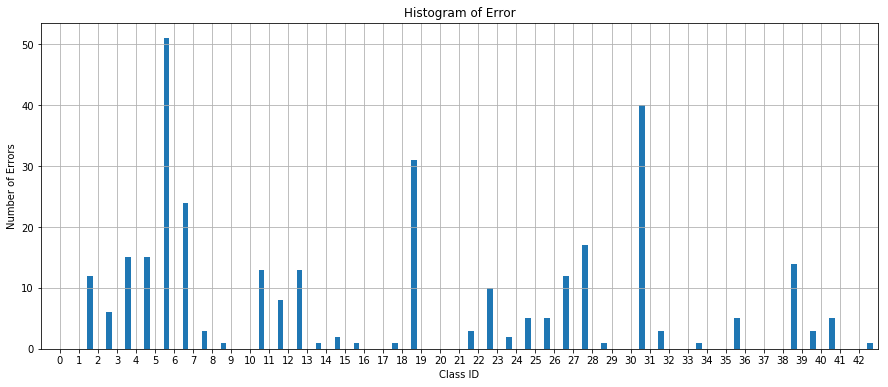

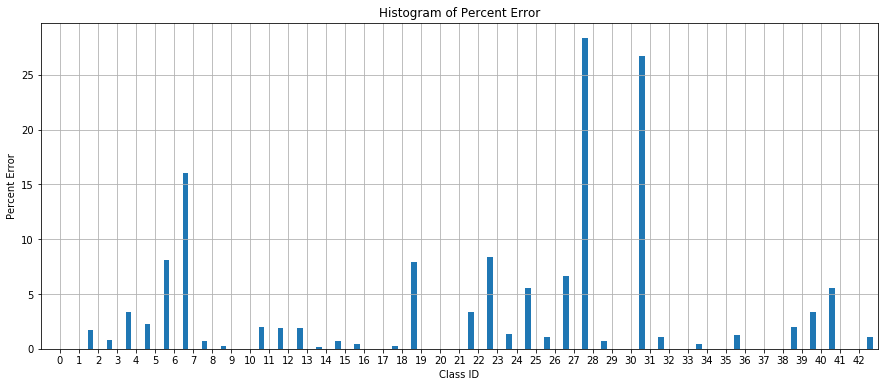

In [14]:
# Histogram of errors

print("Training Accuracy = {:.3f}".format(training_accuracy))
print("Validation Accuracy = {:.3f}".format(validation_accuracy))
print("Test Accuracy = {:.3f}".format(test_accuracy))

predict = tf.argmax(logits,1)
correct = tf.argmax(one_hot_y,1)

def error(X_data,y_data):
    error = []
    errorim = np.empty([0,32,32,3])
    with tf.Session() as sess:
        saver.restore(sess,save_file)
        predictions,correctlabels = sess.run([predict,correct],feed_dict={x: X_data, y: y_data, keep_prob: 1})
        for n in range(len(predictions)):
            if not predictions[n,] == correctlabels[n,]:
                error.append(correctlabels[n,])  
                errorim = np.concatenate([errorim,np.array([X_data[n,:,:,:3]])])
    return error, errorim

#errorTRAIN, errorTRAINim = error(X_TRAIN,y_train)
#errorVALID, errorVALIDim = error(X_VALID,y_valid)
errorTEST,  errorTESTim  = error(X_TEST, y_test)


# plot number of errors for training, validation, and testing
fig, ax = plt.subplots(1,1,figsize=(15,6))

#countsTR = np.bincount(errorTRAIN,minlength=43)
#countsVA = np.bincount(errorVALID,minlength=43)
countsTE = np.bincount(errorTEST,minlength=43)
#maxcounts = max(max(countsTR),max(countsVA),max(countsTE))

index = np.arange(n_classes)
#bar1 = ax.bar(index, countsTR, width=0.3, align='center')
#bar2 = ax.bar(index+0.3, countsVA, width=0.3, align='center')
bar3 = ax.bar(index+0.6, countsTE, width=0.3, align='center')
ax.set_title('Histogram of Error')
ax.set_xlabel('Class ID')
ax.set_ylabel('Number of Errors')
ax.set(xticks=range(n_classes), xlim=[-1, n_classes])
#ax.set(yticks=np.arange(0,maxcounts+np.uint8(maxcounts*0.1),10))
ax.grid()
#ax.legend((bar1[0], bar2[0], bar3[0]), ('Training', 'Validation', 'Testing'))
plt.show() 

# plot % of errors with respect to total number of data
y_train,y_valid,y_test = np.int64(y_train),np.int64(y_valid),np.int64(y_test)


fig, ax = plt.subplots(1,1,figsize=(15,6))

#errorTRAIN_ratio = np.round(100*np.divide(countsTR,np.bincount(y_train,minlength=43)),2)
#errorVALID_ratio = np.round(100*np.divide(countsVA,np.bincount(y_valid,minlength=43)),2)
errorTEST_ratio  = np.round(100*np.divide(countsTE,np.bincount(y_test, minlength=43)),2)
#maxcounts = max(max(errorTRAIN_ratio),max(errorVALID_ratio),max(errorTEST_ratio))

index = np.arange(n_classes)
#bar1 = ax.bar(index, errorTRAIN_ratio, width=0.3, align='center')
#bar2 = ax.bar(index+0.3, errorVALID_ratio, width=0.3, align='center')
bar3 = ax.bar(index+0.6, errorTEST_ratio, width=0.3, align='center')
ax.set_title('Histogram of Percent Error')
ax.set_xlabel('Class ID')
ax.set_ylabel('Percent Error')
ax.set(xticks=range(n_classes), xlim=[-1, n_classes])
#ax.set(yticks=np.arange(0,maxcounts+np.uint8(maxcounts*0.1),10))
ax.grid()
#ax.legend((bar1[0], bar2[0], bar3[0]), ('Training', 'Validation', 'Testing'))
plt.show() 

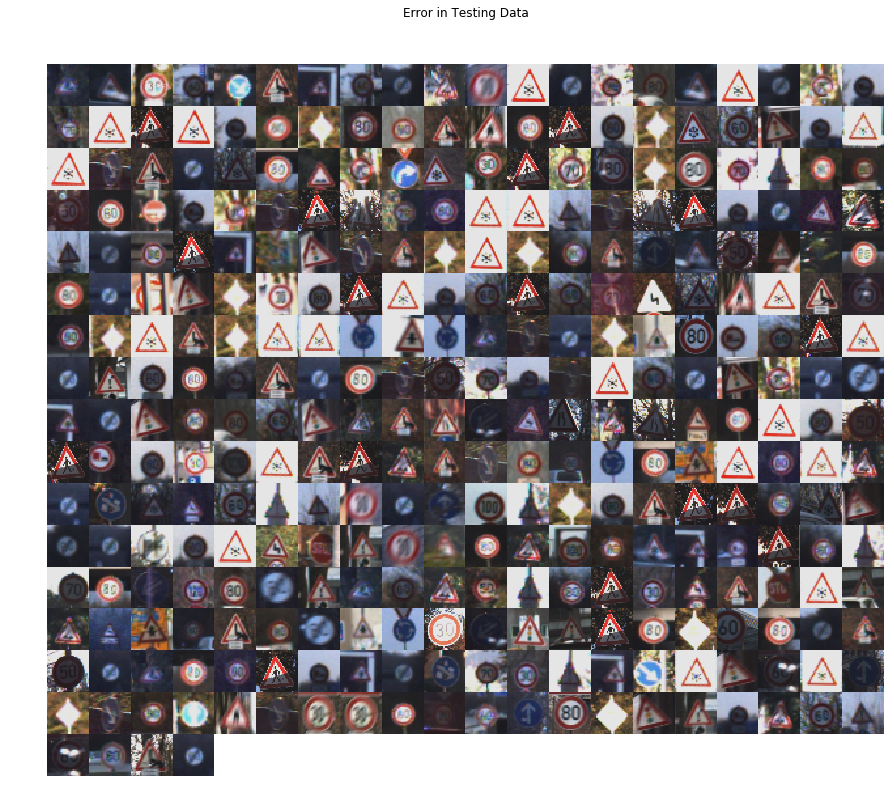

In [15]:
# Show errors

def error_image(data):
    N,M = divmod(len(data), 20)
    output = np.ones([32,32*20,3])
    for n in np.arange(N):
        start = n*20
        end   = (n+1)*20
        output = np.concatenate((output,
                                 np.concatenate((np.array([img for img in data[start:end,:,:,:]])),axis=1)
                                ),axis=0)
    if not M==0:
        addwhite = np.ones([32,32,3])
        addim = np.concatenate([img for img in data[N*20:,:,:,:]],axis=1)
        for m in np.arange(20-M):
            addim = np.concatenate((addim,addwhite),axis=1)
        output = np.concatenate((output,addim),axis=0)
    return output
                       
def show_error_image(inputs, datatype, axnum):
    size = np.uint8(len(inputs)/20)
    fig, ax = plt.subplots(1,1,figsize=(15,size*2))
    ax.imshow(error_image(inputs))
    ax.set_title('Error in '+datatype+' Data')
    ax.axis('off')
    ax.set_ylabel('Number of Samples')

#show_error_image(errorTRAINim, 'Trainig', 0)
#show_error_image(errorVALIDim, 'Validation', 1)
show_error_image(errorTESTim, 'Testing', 2)


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

These images are: <class 'numpy.ndarray'> with dimensions: (32, 32, 3)


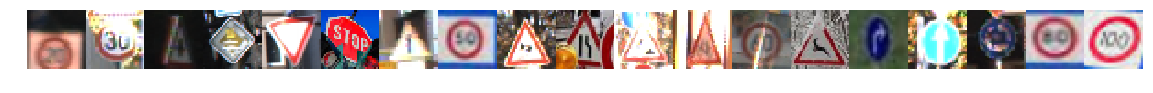

Class IDs are in: <class 'numpy.ndarray'> ID numbers of these images are: [ 0  1 11 12 13 14 18  2 23 24 25 29  3 31 33 35 40  5  7]


In [16]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import cv2
import os
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt

# reading in images (.png)
images = os.listdir("traffic-signs-from-web/")
X_TEST_NEW = np.array([np.array(mpimg.imread("traffic-signs-from-web/"+img)) for img in images])

# resize images to 32x32 and convert from BGRA (4-channel) to BGR (3-channel) 
X_TEST_NEW = np.array([cv2.resize(img,(32,32)) for img in X_TEST_NEW])
X_TEST_NEW = np.array([cv2.cvtColor(img, cv2.COLOR_BGRA2BGR) for img in X_TEST_NEW])

# show images type an dimensions
print('These images are:', type(X_TEST_NEW[2]), 'with dimensions:', X_TEST_NEW[2].shape)

# show all images in a row
one_image = np.concatenate([X_TEST_NEW[img] for img in range(len(X_TEST_NEW))], axis=1)
fig, ax = plt.subplots(1,1,figsize=(20, 20))
ax.imshow(one_image)
ax.axis('off')
plt.show()

# Class IDs of each traffic sign are their file names. Read in class IDs 
# First, remove '.png' characters from the file names
def remove(st):
    return st[:-4]   
y_TEST_NEW = [remove(img) for img in images]
y_TEST_NEW = np.array([int(y) for y in y_TEST_NEW])

# show Class IDs on each image
print('Class IDs are in:', type(y_TEST_NEW), 'ID numbers of these images are:', y_TEST_NEW)

### Predict the Sign Type for Each Image

In [17]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

# scaling in the range 0.1-0.9 using max and min value
def local_scaling_stretch(image):
    return 0.1 + (image-np.min(image))*(0.9-0.1)/(np.amax(image)-np.min(image))

# Convert RGB to Y in YUV and apply CLAHE
def RGB2Y(data):
    data = cv2.convertScaleAbs(0.299*data[:,:,:,0] + 0.587*data[:,:,:,1] + 0.114*data[:,:,:,2])
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(4,4))
    output = np.empty([0,32,32])
    for img in data:
        output = np.concatenate((output, np.array([clahe.apply(img)])),axis=0)
    return output

# Pre-processing dataset: activation function relu
def pre_processing_relu(num_data,data):
    output = np.zeros((num_data,32,32,4))
    output[...,:3] = np.array([local_scaling_stretch(i) for i in data])
    Y_im = RGB2Y(data)
    output[..., 3] = np.array([local_scaling_stretch(i) for i in Y_im])
    return output

# pre-prosessing 
X_TEST_NEW_RUN = pre_processing_relu(len(X_TEST_NEW),X_TEST_NEW)

# predictions
X_TEST_NEW_prediction = tf.equal(tf.argmax(logits,1),tf.argmax(one_hot_y,1))
with tf.Session() as sess:
    saver.restore(sess, save_file)    
    prediction = sess.run(X_TEST_NEW_prediction, feed_dict={x: X_TEST_NEW_RUN, y: y_TEST_NEW, keep_prob: 1})
print('TEST prediction:  {}'.format(prediction))


/Users/AKIKONO/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in true_divide


TEST prediction:  [ True  True False  True  True  True  True False  True  True  True False
 False  True  True  True  True False False]


### Analyze Performance

In [18]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

X_TEST_accuracy = tf.reduce_mean(tf.cast(X_TEST_NEW_prediction,tf.float32))
with tf.Session() as sess:
    saver.restore(sess, save_file)
    accuracy = sess.run(X_TEST_accuracy, feed_dict={x: X_TEST_NEW_RUN, y: y_TEST_NEW, keep_prob: 1})
print('TEST accuracy:  {}'.format(accuracy))

TEST accuracy:  0.6842105388641357


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [19]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

result = tf.nn.softmax(logits)
top_five_prediction =  tf.nn.top_k(result, k=5, sorted=True)
with tf.Session() as sess:
    saver.restore(sess, save_file)
    predict = sess.run(top_five_prediction, feed_dict={x: X_TEST_NEW_RUN, y: y_TEST_NEW, keep_prob: 1})

# reading in images (.png)
images = os.listdir("traffic-signs-43/")
SIGNS = np.array([np.array(mpimg.imread("traffic-signs-43/"+img)) for img in images])

# resize images to 32x32 and convert from BGRA (4-channel) to BGR (3-channel) 
SIGNS = np.array([cv2.resize(img,(64,64)) for img in SIGNS])

def remove(st):
    return st[:-4]   
LABEL = [remove(img) for img in images]
LABEL = np.array([int(y) for y in LABEL])

print('Done')

Done


In [20]:
# obtain sign name from 'signnames.csv' file

signname = []
with open('signnames.csv', 'rt') as f:
    data = csv.reader(f)
    for row in data:
        signname.append(row[1])
signname.pop(0)


'SignName'

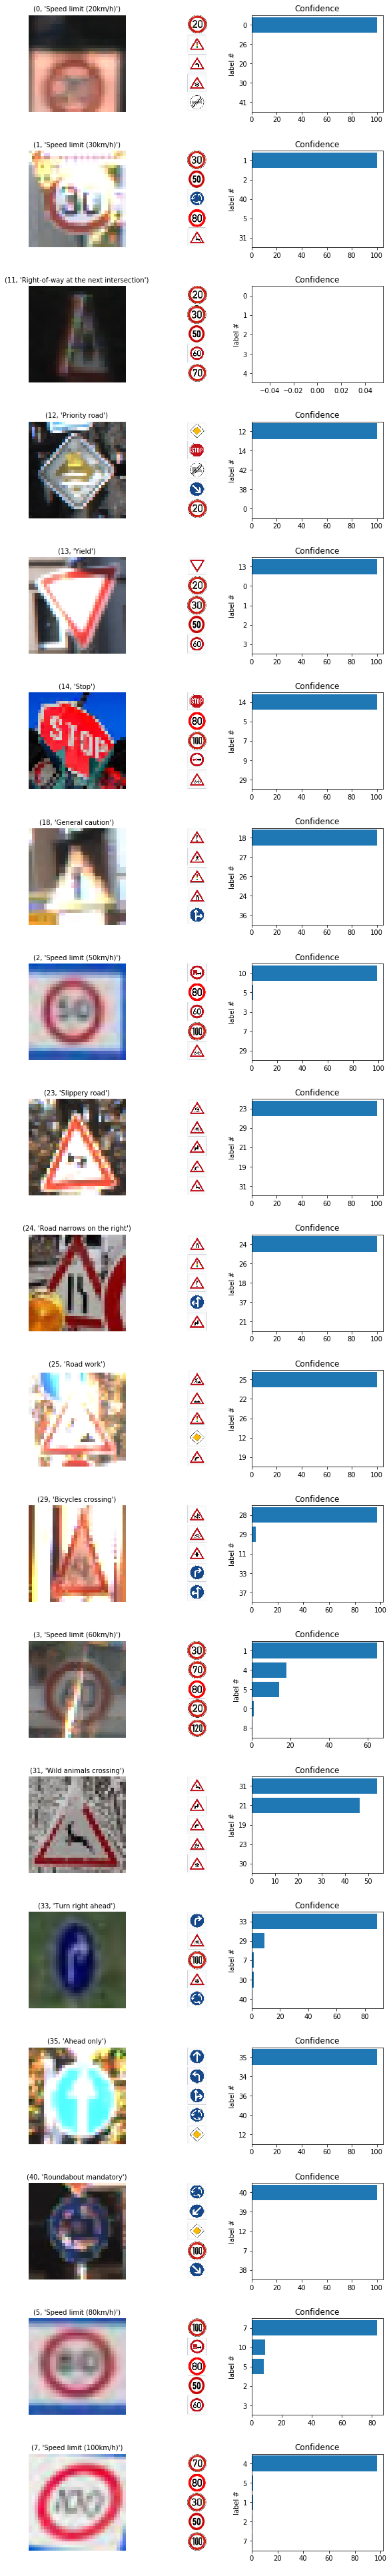

In [21]:
# plot 
from matplotlib import gridspec


fig = plt.figure(figsize=(10,70)) 
gs = gridspec.GridSpec(len(y_TEST_NEW), 3, width_ratios=[2, 1, 2]) 
fig.subplots_adjust(hspace=0.4) 

# prepare data for plot
LABEL_list = LABEL.tolist()
index = []
for m in range(len(y_TEST_NEW)):
    ind = []
    for n in range(5):
        ind.append(LABEL_list.index(predict[1][m][n]))
    index.append(ind)  

predict[0][:][:]=np.round(predict[0][:][:]*100, 2)

for m in range(len(y_TEST_NEW)):
    ID = y_TEST_NEW[m] 
    label = y_TEST_NEW[m],signname[ID]
    plt.subplot(gs[m,0]).set_title(label,size=10)
    plt.subplot(gs[m,0]).set_xlabel('input')
    plt.subplot(gs[m,0]).axis('off')
    plt.subplot(gs[m,0]).imshow(X_TEST_NEW[m])
    for n in range(3):
        if n == 1:
            #[SIGNS[index] for index in LABEL[LABEL[:]==predict[1][m][:]]]
            sign_image = np.concatenate([SIGNS[ind] for ind in index[m][:]], axis=0)
            plt.subplot(gs[m,n]).imshow(sign_image)
            plt.subplot(gs[m,n]).axis('off')
        if n == 2:
            plt.subplot(gs[m,n]).barh(np.arange(5), predict[0][m][:], align='center')
            plt.subplot(gs[m,n]).set_title('Confidence')
            plt.subplot(gs[m,n]).set_ylabel('label #')
            plt.subplot(gs[m,n]).set_ylim(4.5,-0.5)
            plt.subplot(gs[m,n]).set_yticks(np.arange(5))
            plt.subplot(gs[m,n]).set_yticklabels(predict[1][m][:])

plt.show()


---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


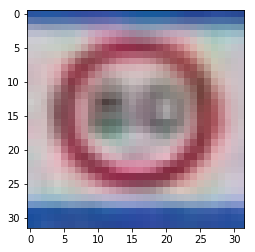

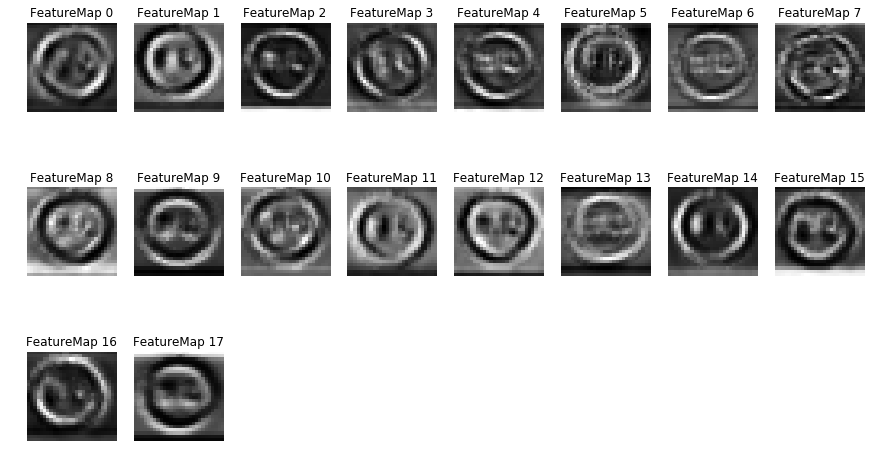

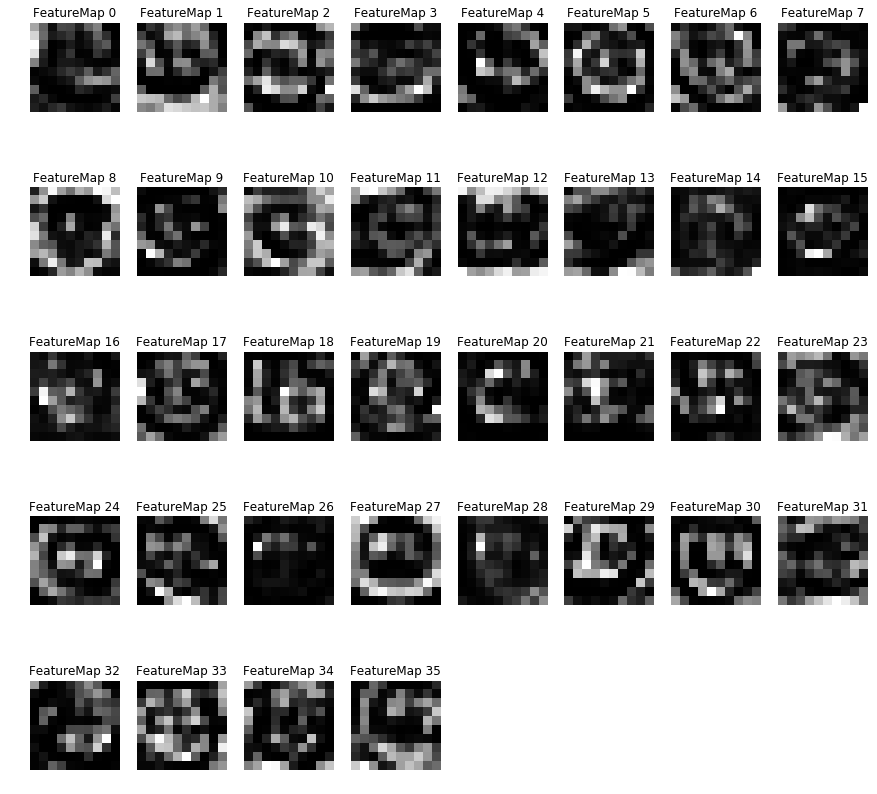

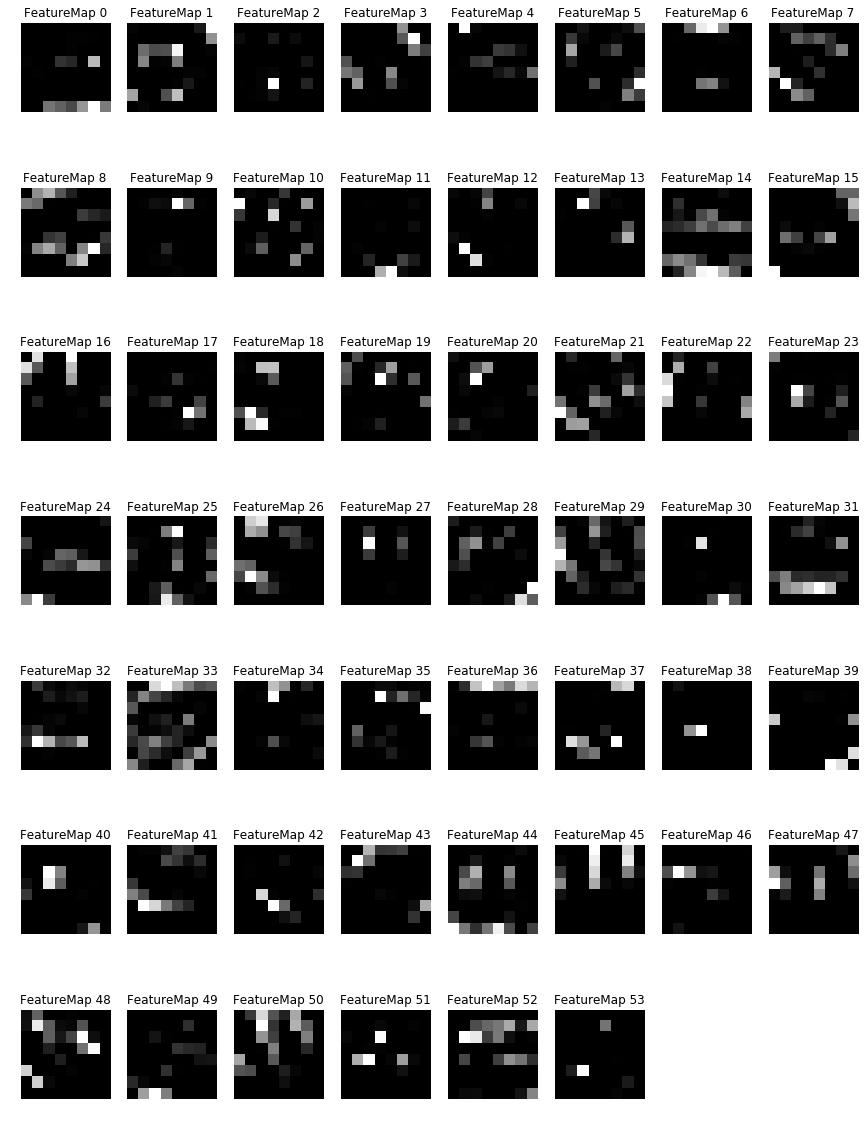

In [23]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents 
# the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, 
# by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, 
# just extend the plt number for each new feature map entry


def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input = []
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    #activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    activation = sess.run(tf_activation, feed_dict={x: image_input, keep_prob: 1})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,60))
    for featuremap in range(featuremaps):
        plt.subplot(20,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
            plt.axis('off')
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
            plt.axis('off')
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
            plt.axis('off')
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
            plt.axis('off')

image = X_TEST_NEW_RUN[-2:,:,:,:]
plt.imshow(X_TEST_NEW_RUN[-2,:,:,:3])
plt.show() 

with tf.Session() as sess:
    saver.restore(sess, save_file)
    outputFeatureMap(image,LeNet.act1)
plt.show()

with tf.Session() as sess:
    saver.restore(sess, save_file)
    outputFeatureMap(image,LeNet.act2)
plt.show()
with tf.Session() as sess:
    saver.restore(sess, save_file)
    outputFeatureMap(image,LeNet.act3)
plt.show()


### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**


Feature map can be used to interporate how the filters are trained. When feature map is blur, it means the filters are not extracting the details of the images.

If some of the feature maps are blackout, then it is due to dying ReLU effect. As ReLU assigns zero values to introduce nonlinearity, the newron became not activated at all while training. ReLU was replaced by ELU which uses non zero value to introduce nonlinearity. 


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 